# Time series

## Time series is a collection of sequence of values with equally spaced time intervals. We can analyze the time series data to identify the underlying pattern to make the predictions.

### it has 2 types of data

## 1. univariate time series data
#### data in which 1 variable is measured at each point in time like returns of a stock in every month ,here variable is 'returns' but value changes every month


## 2. cross sectional data
#### data in which multiple variables are measured at the same point in time or time period like sales of car in past month ,
####  here in a single point of time multiple variables are measured like sales of each car 
#### cross sectional sample provides glimpse of the whole data for that duration


##### special case :  white noise     -> it has no clear pattern and it has zero mean with constant variance , forcasting the future value of a variable is not possible , no pattern in data

## Components/pattern of time series forecasting models
### There are four general components that a time series forecasting model is comprised of:
#### 1. Trend component: the direction in which the data is trending over time , trend exists when there is a persistent increasing or decreasing direction in the data. The trend component does not have to be linear.

#### 2. Cyclical component: the observance of the data deviating over time due to fluctuation
#### 3. Seasonal component: captures the variability of the data over time, also due to fluctuation
#### 4. Irregular component: captures the random variation in data that cannot be predicted in advance and are generally caused by short-term, unanticipated and nonrecurring factors that occur over time

<img src = "https://miro.medium.com/max/518/1*IHQ1wM4x7fI8Bu8Gou5rCw.jpeg" height="20%" width="60%">

### # Stationary data refers to the time series data that mean , autocorrelation and variance do not vary across time , also called as white noise 

### # Using a stationary data set, the model can do prediction based on the fact that mean and variance will remain the same in the future periods , stationarized series is easy to predict
### Box-Jenkins (B-J) methd is used to forcast the future value of a variable in stationary data set

## data is stationary is found using the following methods

###  1. Visual (Rolling statistics)

<img src = "https://miro.medium.com/max/856/1*ltLfFhoZypScZFA6W-D8AA.png">
<img src = "https://miro.medium.com/max/875/1*hgP6gGCccVs7lAN5zUy5UQ.png">

###  2. Augmented Dickey-Fuller -ADF
####  statistical method to find if the series is stationary or not. It is also called as Unit Root Test
#### Hypothesis testing is used here i.e. H0 - Null hypothesis for ADF test is that time series can be represented by a Unit root, that is not stationary
####          Ha =  Alternate hypothesis is that time series is stationary
####  ADF test return test statistics , p-value and critical values.
####  If             test statistic > critical value    OR      p > 0.05  --->    series is not stationary or fail to reject null.
#### Else            p-value <= 0.05                                     --->  data does not have a unit root and is stationary  ,  Reject the null hypothesis 

##  If Data is NOT Stationary then 
###  technique to make the data stationary
#### 1.Differencing: calculates the difference between consecutive terms or points in the data.
#### 2.Seasonality Differencing: the difference between an observation and a previous observation from the same season. 
####       For e.g.; sale of Chocolates is high during festival season. For seasonality differencing we take the sales of Chocolates last year during festival season and sales this year during festival 
#### 3.Log transformation or square root or power transformation: helps to stabilize the non-constant variance of a series
## Removing Random Noise / Smoothening
####  Smoothing is a statistical technique that can reveal the underlying trend, or seasonality or cyclic pattern present in the time series data. Smoothing data removes random variation and reveals trends and cyclic components.


In [1]:
import pandas_datareader as pdr

import pandas as pd

from datetime import datetime


from matplotlib import pyplot as plt

from matplotlib import rcParams

# figure size in inches (width, height)
rcParams['figure.figsize'] = 16,8

In [2]:
df = pdr.get_data_yahoo('AMZN', start=datetime(2000, 1, 1))  

df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-12-31,79.3750,76.000000,79.3125,76.1250,7270700,76.1250
2000-01-03,89.5625,79.046875,81.5000,89.3750,16117600,89.3750
2000-01-04,91.5000,81.750000,85.3750,81.9375,17487400,81.9375
2000-01-05,75.1250,68.000000,70.5000,69.7500,38457400,69.7500
2000-01-06,72.6875,64.000000,71.3125,65.5625,18752000,65.5625


# Time series models to predict future values:   (All the following models is in  statsmodels.tsa package)

### 1. AR (Autoregressive) model
#### suited for data without trend and seasonal component , data should have a long-term/linear trend
####  it also represented as Yt = a0 + a1*Yt-1 + a2*Yt-2 + ... + an*Yt-n
#### e.g. stock price, oil price, inflation, unemployment rate, etc.
### 2. MA (Moving Average) model
#### Yt is depends on random error terms that are not linear or  follows white noise
#### 
####  suitable for data without trend and seasonality , it uses ARMA with order = (0, 1)  =  (AR , MA)   ., i.e consider only MA part
####  Noise between consecutive time points is accounted for by Moving Averages. The model that uses dependency between an observation and its residual error from a moving average model applied to lagged observations
#### Identification of the MA model is done best by ACF(Auto Correlation Function) and PACF(Partial Auto Correlation Function)
####  e.g 
### 3. ARMA (Autoregressive Moving Average) model
#### it is a combination of AR and MA model , we set order here as AR(p) and MA(q) i.e. order =(p,q)
### 4. ARIMA (Autoregressive Integrated Moving Average) model
####  it requires 3 parameters to be set , order = (p,d,q)  where p is the autoregressive order, d is the differencing order and q is the moving average order
#### p,d,q is determined by the running iterations for the various values
#### for p , PACF(partial auto correletion function ) is used to identify the best value of p , it explains the partial correlation between the series and lags of itself.
#### for q , ACF(auto correlation function) is used to identify the best value of q , it is bar chart of coefficients of correlation between a time series and it lagged values.
### 5. SARIMA (Seasonal Autoregressive Integrated Moving Average) model
####  Seasonal ARIMA models rely on seasonal lags and differences to fit the seasonal pattern.
####  SARIMA model is represented by SARIMA(p,d,q)x(P,D,Q)  P is the number of seasonal autoregressive terms ,D is the number of seasonal differences ,Q is the number of seasonal moving-average terms
#### 
#### 
#### 

In [3]:
#  creating a new column with 10 days rolling mean/avarage of the closing price

df['Close-10d-rolling'] = df['Close'].rolling(window=10).mean()

df.head(20)

,High,Low,Open,Close,Volume,Adj Close,Close-10d-rolling
Date,,,,,,,
1999-12-31,79.3750,76.000000,79.3125,76.1250,7270700,76.1250,NaN
2000-01-03,89.5625,79.046875,81.5000,89.3750,16117600,89.3750,NaN
2000-01-04,91.5000,81.750000,85.3750,81.9375,17487400,81.9375,NaN
2000-01-05,75.1250,68.000000,70.5000,69.7500,38457400,69.7500,NaN
2000-01-06,72.6875,64.000000,71.3125,65.5625,18752000,65.5625,NaN
2000-01-07,70.5000,66.187500,67.0000,69.5625,10505400,69.5625,NaN
2000-01-10,72.6250,65.562500,72.5625,69.1875,14757900,69.1875,NaN
2000-01-11,70.0000,65.000000,66.8750,66.7500,10532700,66.7500,NaN
2000-01-12,68.0000,63.000000,67.8750,63.5625,10804500,63.5625,NaN


<AxesSubplot:xlabel='Date'>

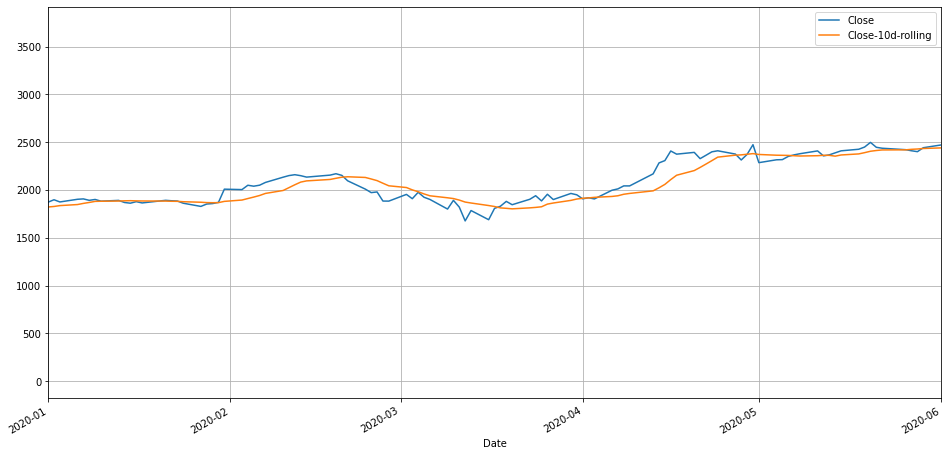

In [4]:
df.loc[:, ['Close', 'Close-10d-rolling']].plot(grid=True , xlim=["2020-01-01", "2020-06-01"])

<AxesSubplot:xlabel='Date'>

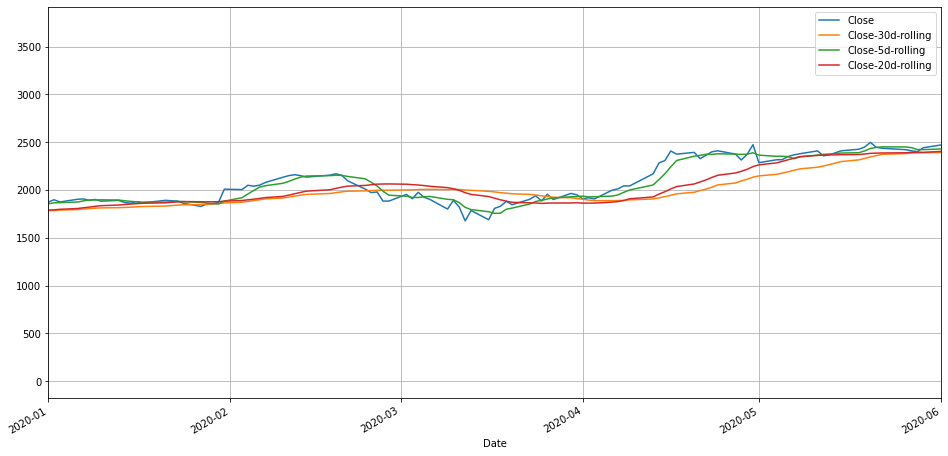

In [5]:
#  similarly for 30 days rolling mean/avarage

df["Close-30d-rolling"] = df["Close"].rolling(window=30).mean()
df["Close-5d-rolling"] = df["Close"].rolling(window=5).mean()
df["Close-20d-rolling"] = df["Close"].rolling(window=20).mean()


df.loc[:, ['Close', 'Close-30d-rolling', 'Close-5d-rolling', 'Close-20d-rolling']].plot(grid=True , xlim=["2020-01-01", "2020-06-01"])

In [6]:
#  expanding is used to calculate cummulative operation on data like 1st expand = 1st row, 2nd expand = (1st row + 2nd row )/2, 
#                                                                                   3rd expand = (1st row + 2nd row + 3rd row)/3    -- for min_periods=1
#            nth expand = (sum of all elements upto nth row ) / n



df["Open"].expanding(min_periods=1).mean()      # CMA  (cumulative moving average)

Date
1999-12-31     79.312500
2000-01-03     80.406250
2000-01-04     82.062500
2000-01-05     79.171875
2000-01-06     77.600000
                 ...    
2022-02-18    618.227644
2022-02-22    618.656815
2022-02-23    619.090038
2022-02-24    619.480720
2022-02-25    619.909692
Name: Open, Length: 5575, dtype: float64

In [7]:
df["Open"]

Date
1999-12-31      79.312500
2000-01-03      81.500000
2000-01-04      85.375000
2000-01-05      70.500000
2000-01-06      71.312500
                 ...     
2022-02-18    3109.989990
2022-02-22    3009.570068
2022-02-23    3033.010010
2022-02-24    2796.750000
2022-02-25    3011.000000
Name: Open, Length: 5575, dtype: float64

Text(0.5, 1.0, 'Expanding Mean')

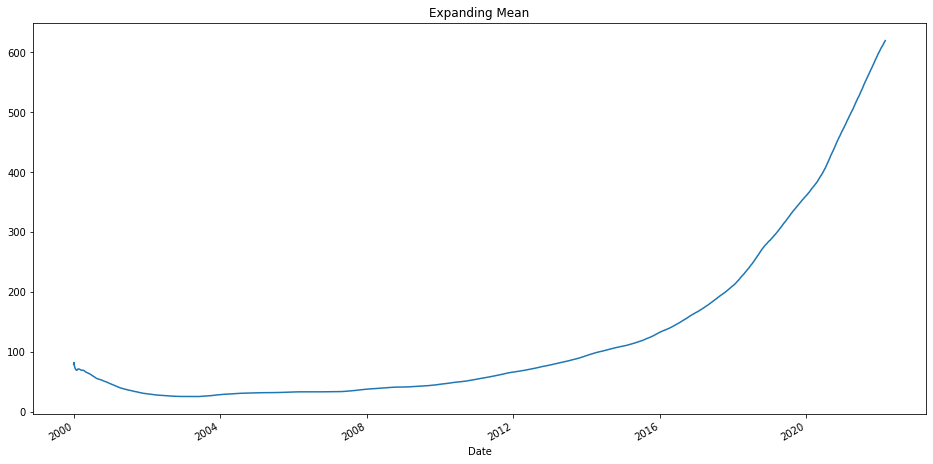

In [8]:
df["Open"].expanding(min_periods=1).mean().plot().set_title("Expanding Mean")

Text(0.5, 1.0, 'EWMA')

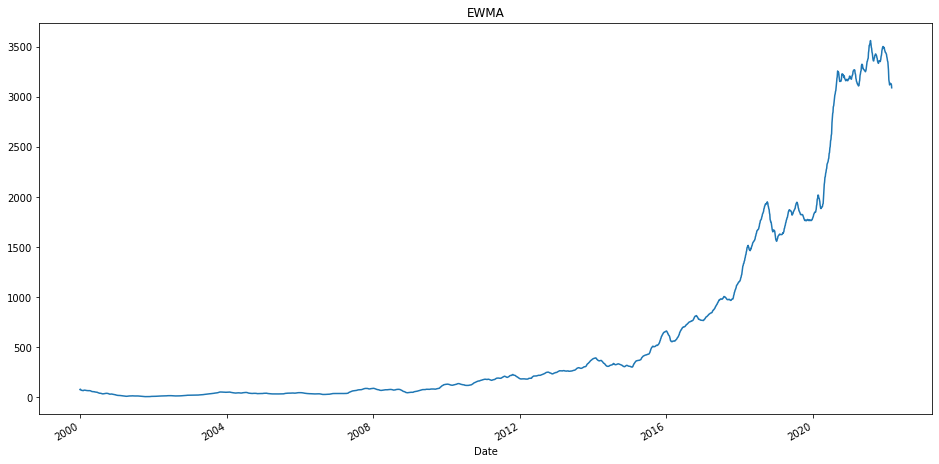

In [9]:
#  EWMA (exponential weighted moving  average)

# EWMA(t) = a * x(t) + (1-a) * EWMA(t-1)

            # EWMA(t) = moving average at time t
            # a = degree of mixing parameter value between 0 and 1
            # x(t) = value of signal x at time t


#  Advatages :

#   1. User can give weightage to each data point at his/her convenience. This weightage can be changed to compare various averages.
#   2. EWMA displays the data geometrically. Because of that, data doesn’t get affected much when outliers occur.

df["Open"].ewm(span=30).mean().plot().set_title("EWMA")     # span is used to  smoothing value

In [10]:
df["EMA-open"] = df["Open"].ewm(alpha = 0.12).mean()        # alpha is for EMA

<AxesSubplot:xlabel='Date'>

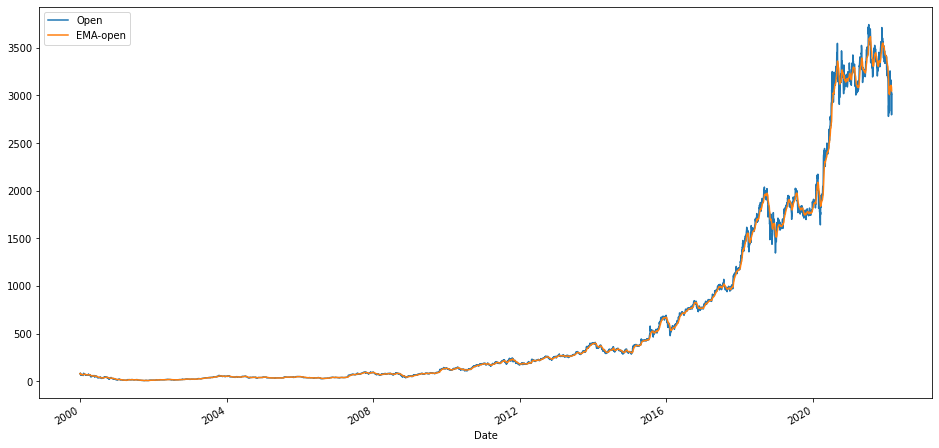

In [12]:
df[["Open","EMA-open"]].plot() 

In [1]:
#  ARIMA (Auto regressive Integrated Moving Average)   , use if you see autocorrelation in the data, i.e. the past data explains the present data well

